In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [12,6]

(2000, 1500, 3)


Text(0.5, 1.0, 'Original Image')

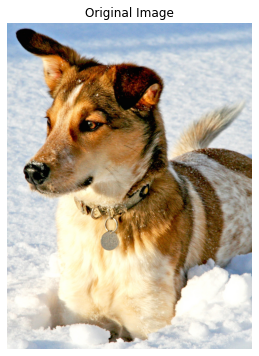

In [4]:
Oimg = imread('dog.jpg')
print(Oimg.shape)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

In [5]:
Oimg = np.mean(Oimg,-1)                 # Converting to Grayscale

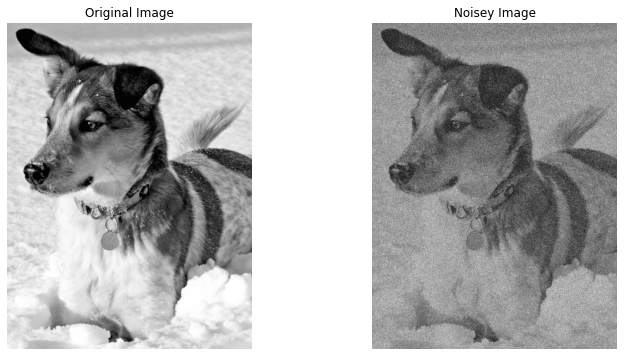

In [6]:

mean = 0
sigma = 3

Noise = np.random.normal(mean, sigma, (Oimg.shape[0],Oimg.shape[1])).astype('uint8')
OimgNoisey = Oimg + Noise           # Add some noise

plt.figure(1)
plt.subplot(121)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

plt.subplot(122)
img2 = plt.imshow(OimgNoisey)
plt.axis('off')
img2.set_cmap('gray')
plt.title("Noisey Image")
plt.show()

In [24]:
def L2Regularisation(NoiseyInput, ExpectedOutput):
    
    # n = len(ExpectedOutput)
    # I = np.identity(n)
    # A = I
    # At = A.T
    # AtA = np.matmul(At,A)
    # M = (AtA - factor*I)

    # T = np.matmul(np.linalg.inv(M),At)
    # pred = np.matmul(T,NoiseyInput)
    
    factor = 0
    x = ExpectedOutput
    b = NoiseyInput
    accuracy = 1
    learning_rate = 0.001
    condition = True
    while condition:

        L = np.matmul(x.T,x) - np.matmul(x.T,b) - np.matmul(b.T,x) + np.matmul(b.T,b) - factor*np.matmul(b.T,b) 

        dfactor = -np.matmul(b.T,b)

        factor_new = factor - learning_rate*dfactor
        print(factor_new)
        accuracy = abs(factor_new-factor)
        condition = ((accuracy > (10**(-3))) & (factor<=1))
        factor = factor_new

    print("Lambda = ", factor)
    plt.figure()
    plt.subplot(131)
    img1 = plt.imshow(NoiseyInput)
    img1.set_cmap('gray')
    plt.axis('off')
    plt.title(f'Noisey Image (lambda = {factor})')
    
    plt.subplot(132)
    img2 = plt.imshow(pred)
    img2.set_cmap('gray')
    plt.axis('off')
    plt.title('Denoised Image')
    
    plt.subplot(133)
    img3 = plt.imshow(ExpectedOutput)
    img3.set_cmap('gray')
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

In [25]:
L2Regularisation(OimgNoisey,Oimg)

[[231643.95166667 198359.31944444 196920.25722222 ... 178599.69455556
  176847.01577778 174250.27344444]
 [198359.31944444 224641.48033333 193320.73977778 ... 174248.55244444
  173168.76922222 171289.76866667]
 [196920.25722222 193320.73977778 222057.67622222 ... 175128.90155556
  172362.04366667 170308.27933333]
 ...
 [178599.69455556 174248.55244444 175128.90155556 ... 193084.86955556
  161226.21988889 160416.64688889]
 [176847.01577778 173168.76922222 172362.04366667 ... 161226.21988889
  187975.38622222 157425.55166667]
 [174250.27344444 171289.76866667 170308.27933333 ... 160416.64688889
  157425.55166667 185002.80777778]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
L2Regularisation(0.8,OimgNoisey,Oimg)

In [ ]:
L2Regularisation(1,OimgNoisey,Oimg)

In [ ]:
i=0.2
it = np.arange(i,3,i*2)
for factor in (0,0.2,0.5,0.8,1,1.2,1.4):
    L2Regularisation(factor,OimgNoisey,Oimg)